In [1]:
import csv
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
%run Pipeline//classify_and_evaluate
%run Pipeline//upload_and_vizualize
%run Pipeline//aux
import pylab as pl
import seaborn as sn
from datetime import datetime as dt
from datetime import date 

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
cal = pd.read_csv('calendar_chicago_2015.csv')
cal_copy = cal.copy()

In [3]:
cal.head()

,listing_id,date,available,price
0,14831696,2018-04-01,f,NaN
1,14831696,2018-03-31,f,NaN
2,14831696,2018-03-30,f,NaN
3,14831696,2018-03-29,f,NaN
4,14831696,2018-03-28,f,NaN


In [5]:
cal.transpose().head()

,0,1,2,3,4,5,6,7,8,9,...,5541785,5541786,5541787,5541788,5541789,5541790,5541791,5541792,5541793,5541794
listing_id,14831696,14831696,14831696,14831696,14831696,14831696,14831696,14831696,14831696,14831696,...,17634195,17634195,17634195,17634195,17634195,17634195,17634195,17634195,17634195,17634195
date,2018-04-01,2018-03-31,2018-03-30,2018-03-29,2018-03-28,2018-03-27,2018-03-26,2018-03-25,2018-03-24,2018-03-23,...,2017-04-11,2017-04-10,2017-04-09,2017-04-08,2017-04-07,2017-04-06,2017-04-05,2017-04-04,2017-04-03,2017-04-02
available,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [7]:
dprint(dt.strptime(cal.loc[1].date,'%Y-%m-%d'))

2018-03-31 00:00:00


In [3]:
def convert_to_datetime(series_row):
    return dt.strptime(series_row,'%Y-%m-%d')

def convert_to_weekday(series_row,output):
    if output == 'day_num':
        return date.weekday(series_row)
    output_dict = {"weekday":'%A', "month_name":'%B',"month_num":'%m'}
    return date.strftime(series_row,output_dict[output])

def convert_to_bool(df, column, conversion):
    return df[column].replace(conversion)

def add_date_cols(df, date_column):
    df['datetime'] = df[date_column].apply(convert_to_datetime)
    df['day_num'] = df.datetime.apply(convert_to_weekday, output='day_num')
    df['day_of_week'] = df.datetime.apply(convert_to_weekday, output='weekday')
    df['month'] =  df.datetime.apply(convert_to_weekday, output='month_name')
    df['month_num'] =  df.datetime.apply(convert_to_weekday, output='month_num')

In [5]:
def get_occupied_frame(df, occ_column, date_column, conversion, bool_param):
    add_date_cols(df,date_column)
    df[occ_column] = convert_to_bool(df,occ_column,conversion)
    return df[df[occ_column] == bool_param]

In [6]:
d = {'t': True, 'f': False}
cal_occupied = get_occupied_frame(cal,'available','date', d, True)

In [191]:
cal_occupied.count()

listing_id     1260635
date           1260635
available      1260635
price          1260635
datetime       1260635
day_num        1260635
day_of_week    1260635
month          1260635
month_num      1260635
dtype: int64

In [214]:
cal_occupied.dtypes

listing_id              int64
date                   object
available                bool
price                  object
datetime       datetime64[ns]
day_num                 int64
day_of_week            object
month                  object
month_num              object
dtype: object

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


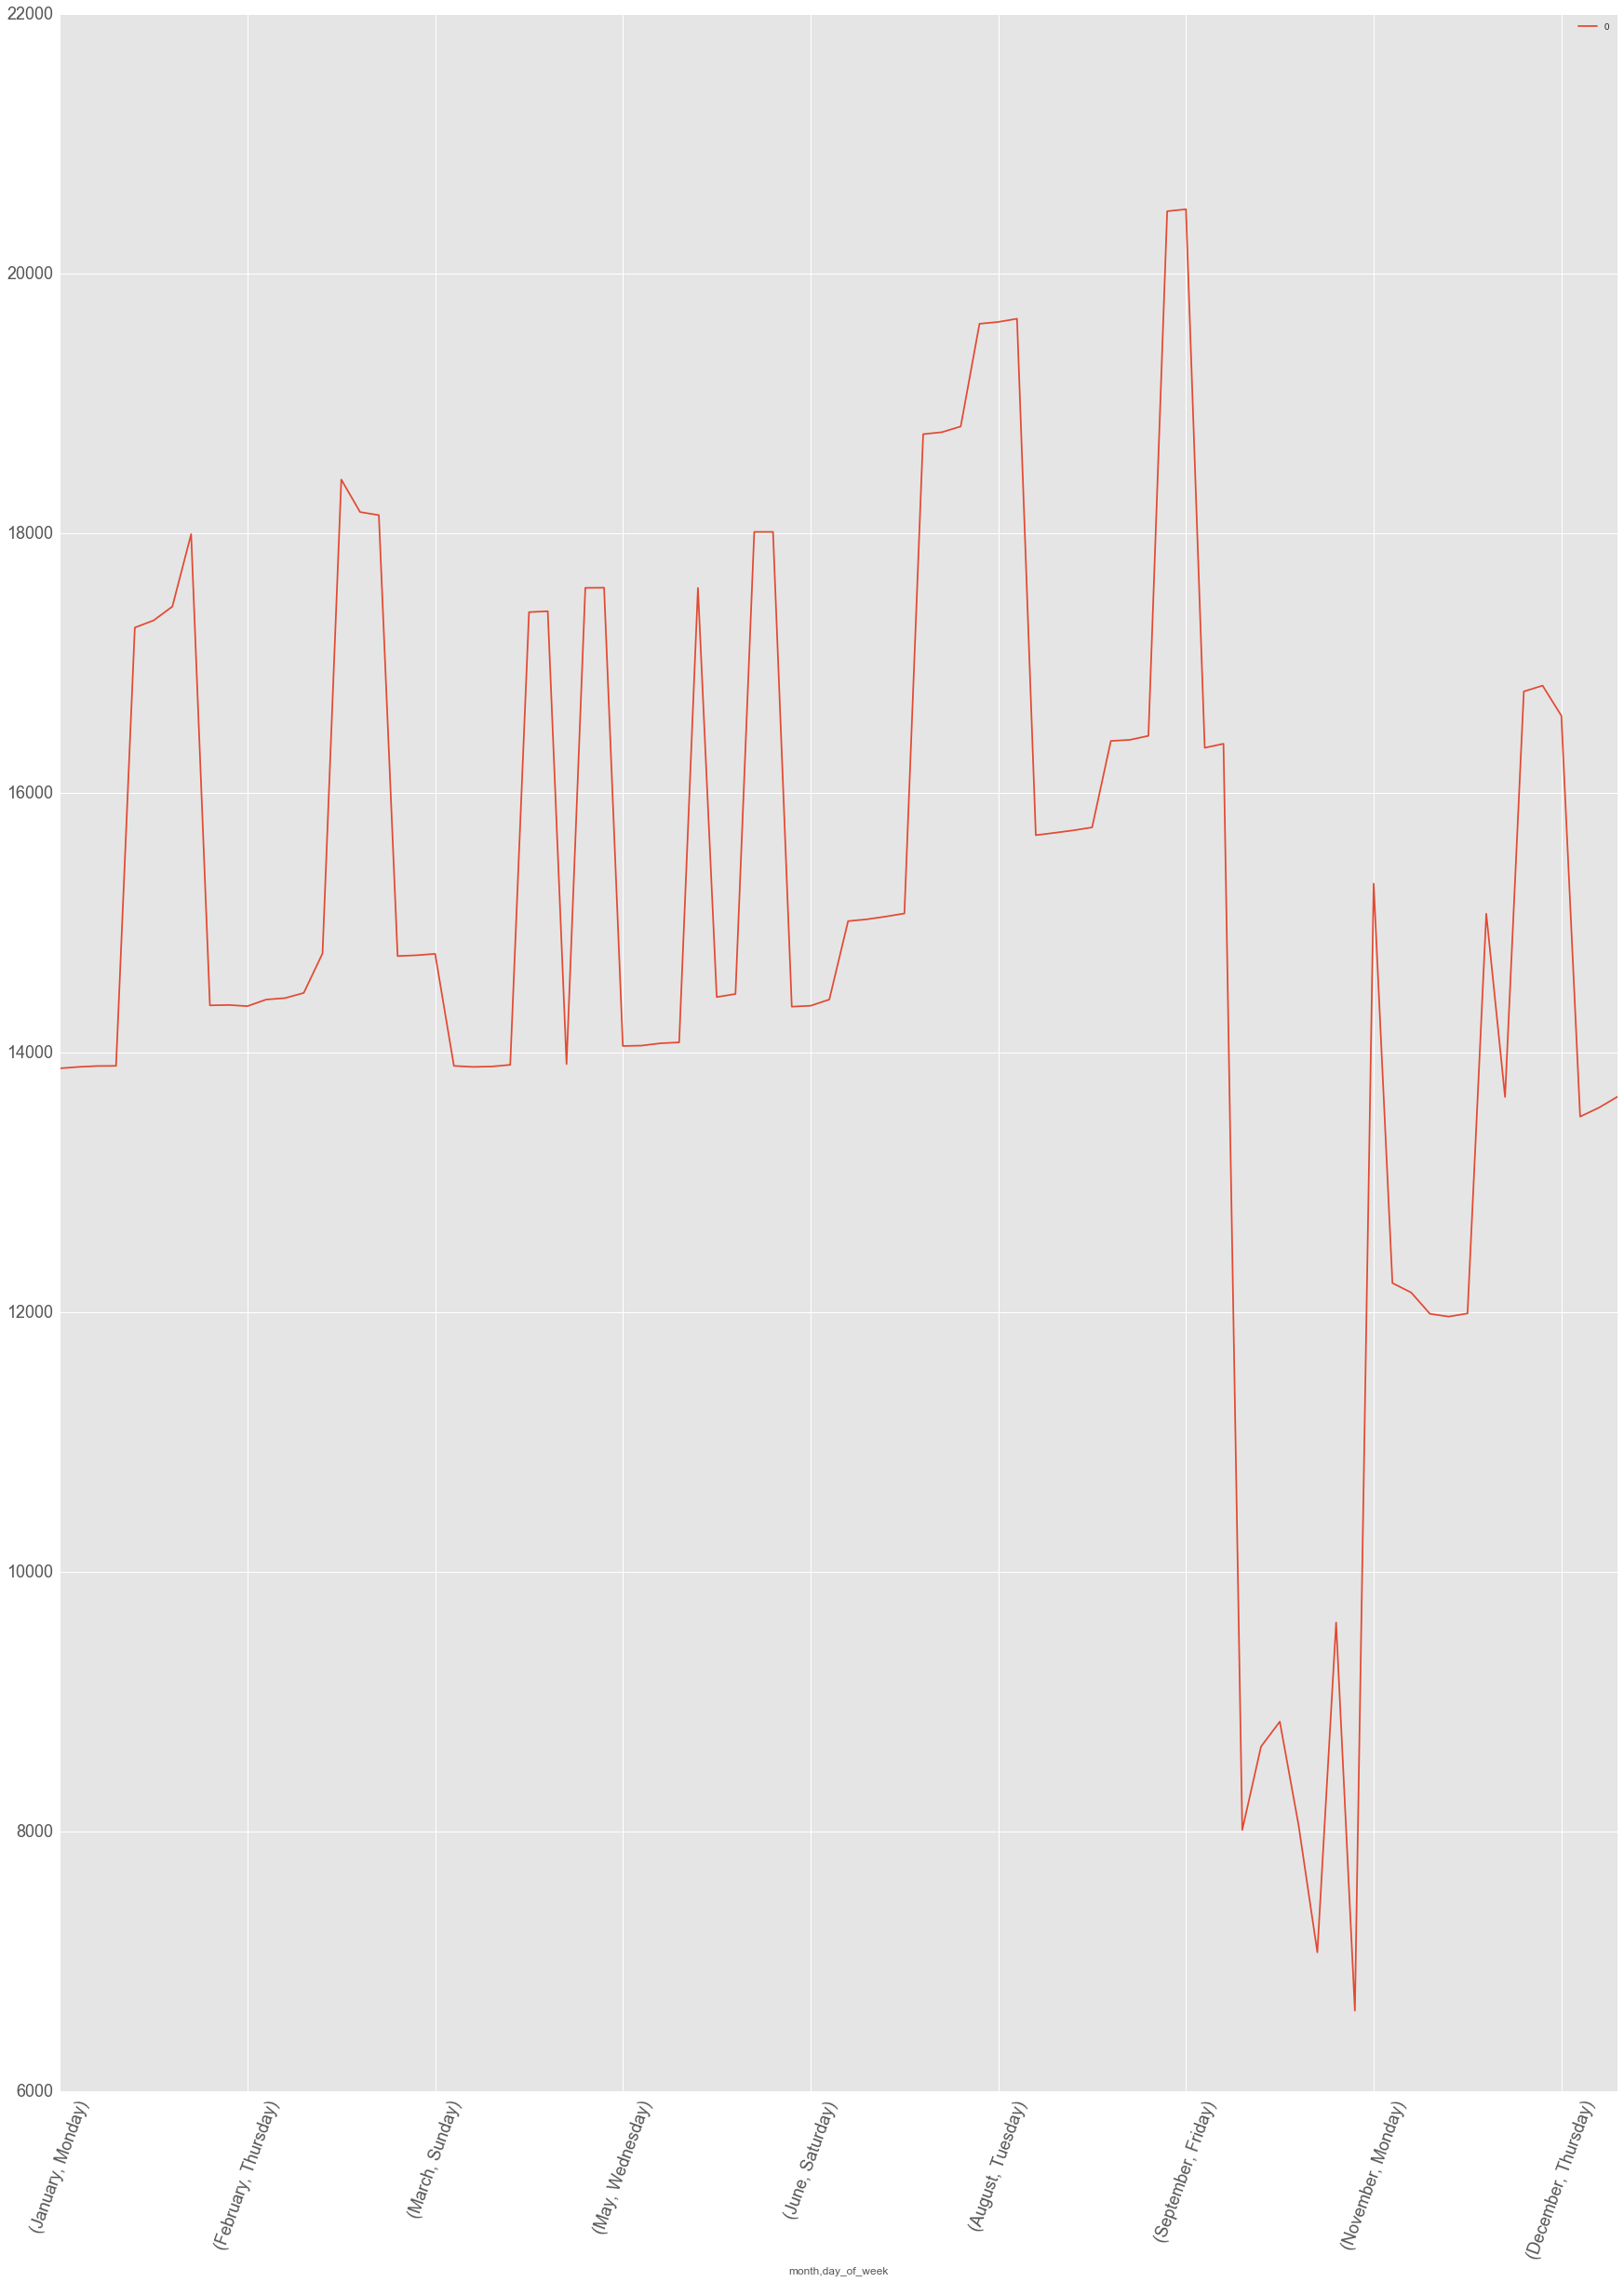

In [6]:

cal_unavailable_monthXDay = cal_occupied.sort(['month_num','day_num']).groupby(['month','day_of_week'], sort=False).size().to_frame()

cal_unavailable_monthXDay.plot(kind='line',figsize=(30,40), fontsize=18,rot=70)

month_num index     01                                               02  \
day_num              0      1      2      3      4      5      6      0   
0             0  13882  13893  13900  13901  17277  17332  17439  17997   

month_num         ...       11                   12                       \
day_num        1  ...        4      5      6      0      1      2      3   
0          14367  ...    11970  11994  15073  13661  16785  16830  16598   

month_num                       
day_num        4      5      6  
0          13510  13579  13664  

[1 rows x 85 columns]

By listing_id and month, count of occupied, and sum

In [ ]:

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name,i in cal_occupied.sort('month_num').groupby(['listing_id','month'],sort=False):#.available.count().to_frame():#.plot(kind='scatter')
    fig, ax = plt.subplots()
    print(name,i)
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    ax.plot(i[0], i[1], marker='o', linestyle='', ms=12)

In [7]:
small = cal_occupied[['listing_id','price']]

def convert_to_float(series_row):
    return float(series_row.replace('$','').replace(',',''))

small['priceNo$'] = small.price.apply(convert_to_float)
small.head()

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,listing_id,price,priceNo$
4,1874928,$121.00,121.0
10,1874928,$108.00,108.0
11,1874928,$129.00,129.0
12,1874928,$138.00,138.0
25,1874928,$105.00,105.0


In [8]:
listing = []
avg_price = []
for index, i in enumerate(small.groupby('listing_id').mean().iterrows()):#.available.count().to_frame():#.plot(kind='scatter')
    listing.append(i[0])
    avg_price.append(i[1][0])

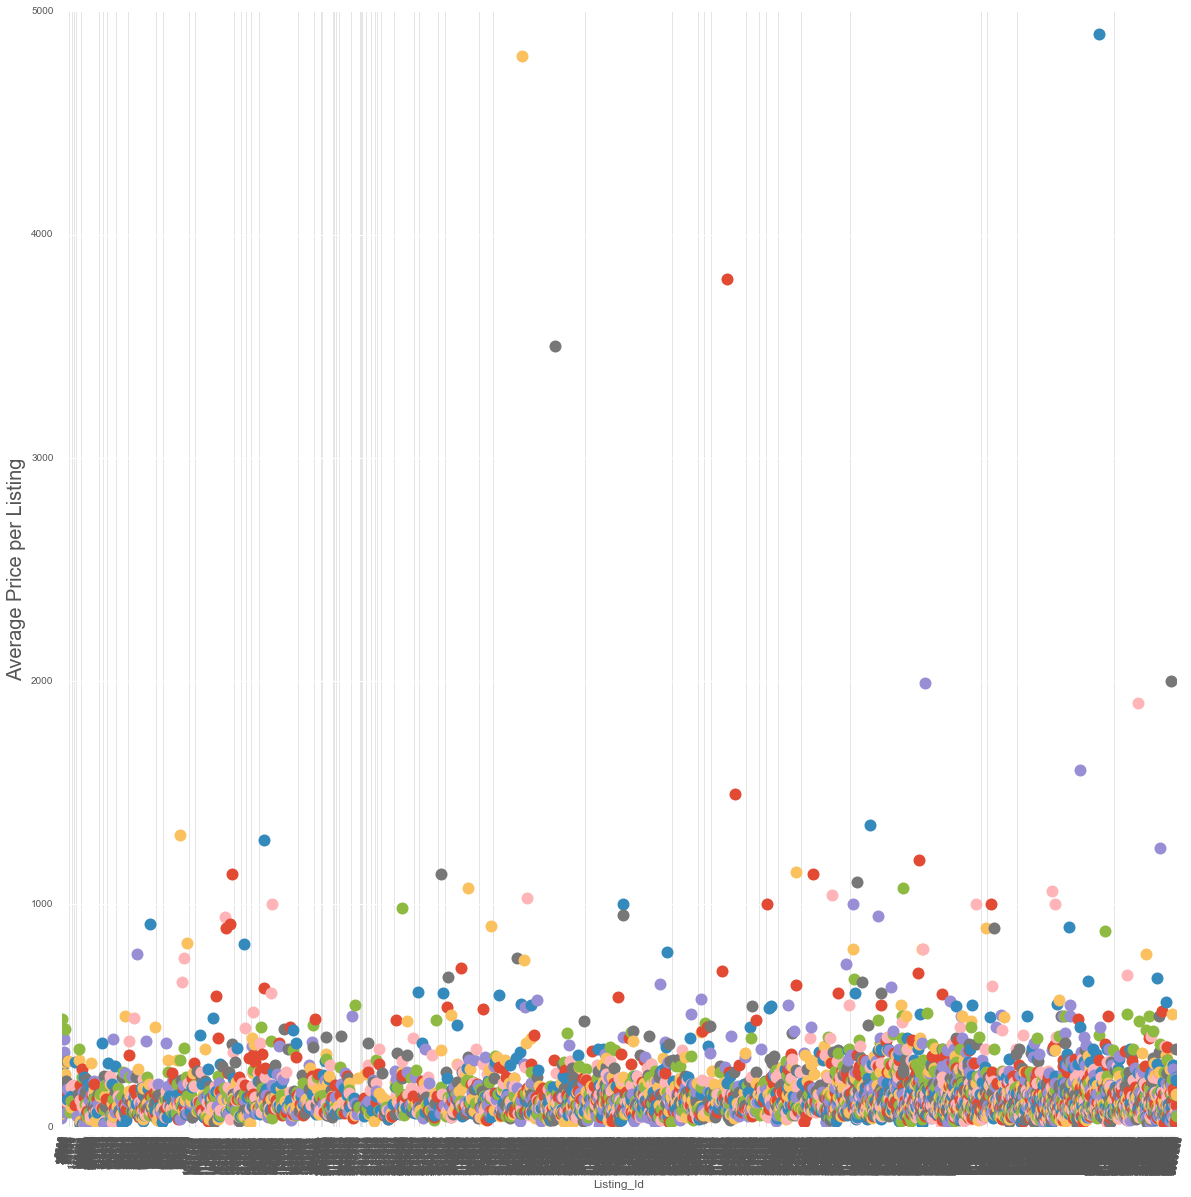

In [9]:
fig = plt.figure(figsize=(20,20))
plt.xticks(listing, listing, rotation=80)
ax = fig.add_subplot(1,1,1)
#ax.xticks(listing,None,rotation='vertical')
ax.set_ylabel('Average Price per Listing', fontsize=20)
ax.set_xlabel('Listing_Id', fontsize=12)
for index, i in enumerate(small.groupby('listing_id').mean().iterrows()):#.available.count().to_frame():#.plot(kind='scatter')
    ax.plot(i[0], i[1], marker='o', linestyle='', ms=12)


(0, 1500)

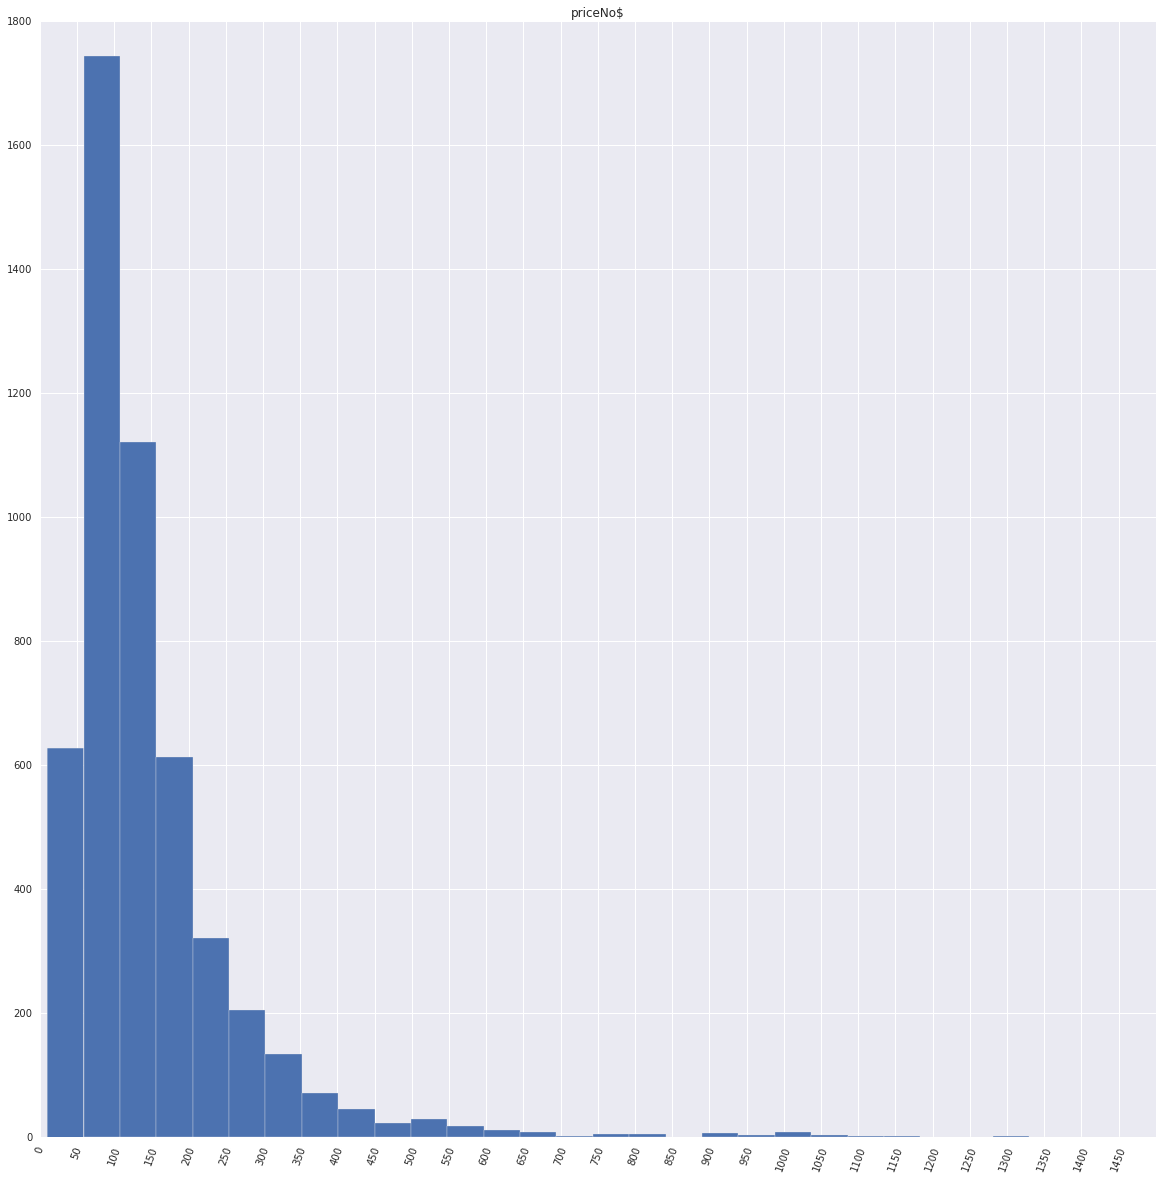

In [249]:


small.groupby('listing_id').mean().hist(bins=100, figsize=(20,20))
plt.xticks(range(0,1500,50), rotation=70)
plt.xlim(0,1500,25)


In [11]:
chicago_listing = read_file('chicago_listings.csv')

In [22]:
all_cols, all_cols_caps, pt_columns = list_describe(chicago_listing)

                 id
count  5.147000e+03
mean   5.408046e+06
std    2.519789e+06
min    2.384000e+03
25%    3.632306e+06
50%    6.200526e+06
75%    7.558910e+06
max    8.689532e+06 

                                     name
count                                5147
unique                               5098
top     Private Room with Shared Bathroom
freq                                    4 

            host_id
count  5.147000e+03
mean   1.779156e+07
std    1.422345e+07
min    3.040000e+02
25%    4.487353e+06
50%    1.472736e+07
75%    3.062774e+07
max    4.560581e+07 

       host_name
count       5109
unique      1795
top        David
freq          60 

       neighbourhood_group
count                  0.0
mean                   NaN
std                    NaN
min                    NaN
25%                    NaN
50%                    NaN
75%                    NaN
max                    NaN 

       neighbourhood
count           5147
unique            69
top        West Town
freq    

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


/Users/andrewyaspan/Documents/ml_project/ML_Project/Pipeline/upload_and_vizualize.py:131: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  df.boxplot(column=column_name, ax = ax2); ax2.set_title('Boxplot of '+column_name)


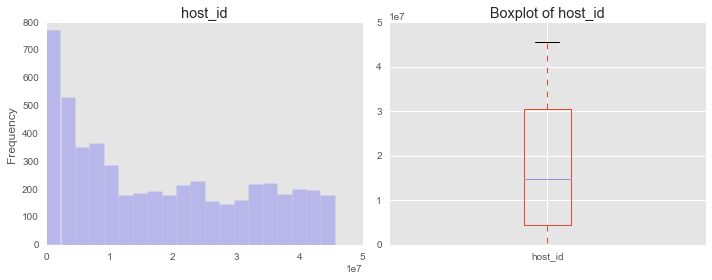

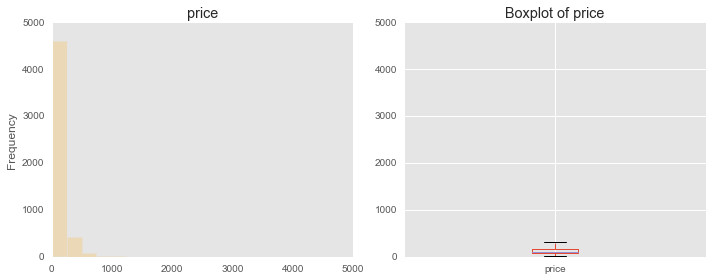

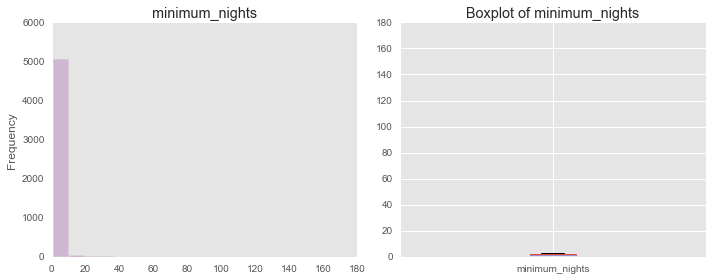

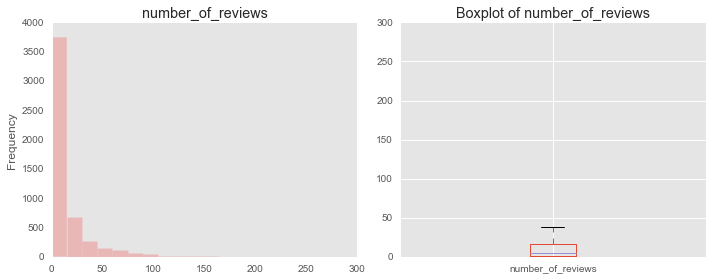

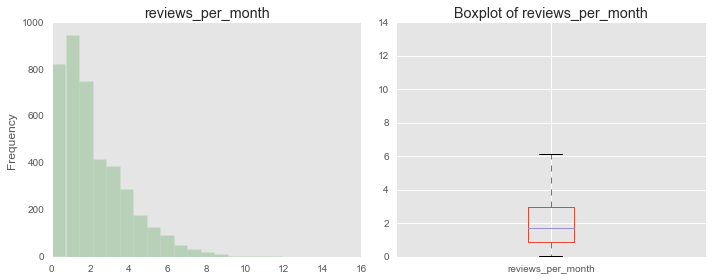

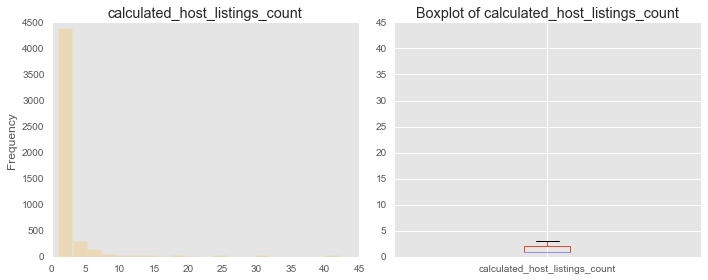

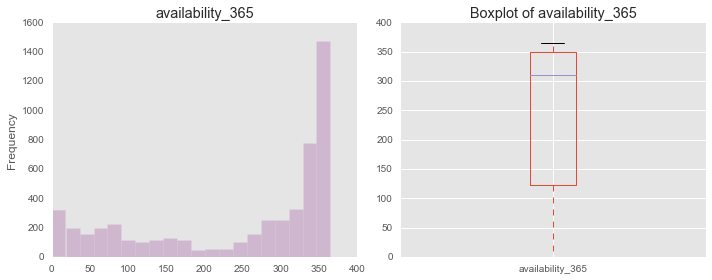

In [58]:
create_hist_box(chicago_listing,all_cols,['id','name','host_name','neighbourhood_group','neighbourhood','room_type','latitude','longitude','room_type','last_review'])

In [60]:
chicago_listing.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1874928,Sunny 2Bd 1Ba HEART of LINCOLN SQ.!,9767449,Rick And Suzanne,NaN,Lincoln Square,41.965926,-87.683117,Entire home/apt,142,2,34,2015-09-22,2.71,1,144
1,739495,Lovely 2 bedroom in Lincoln Square,3867687,Janet,NaN,Lincoln Square,41.977993,-87.681208,Entire home/apt,120,3,61,2015-09-22,2.27,1,134


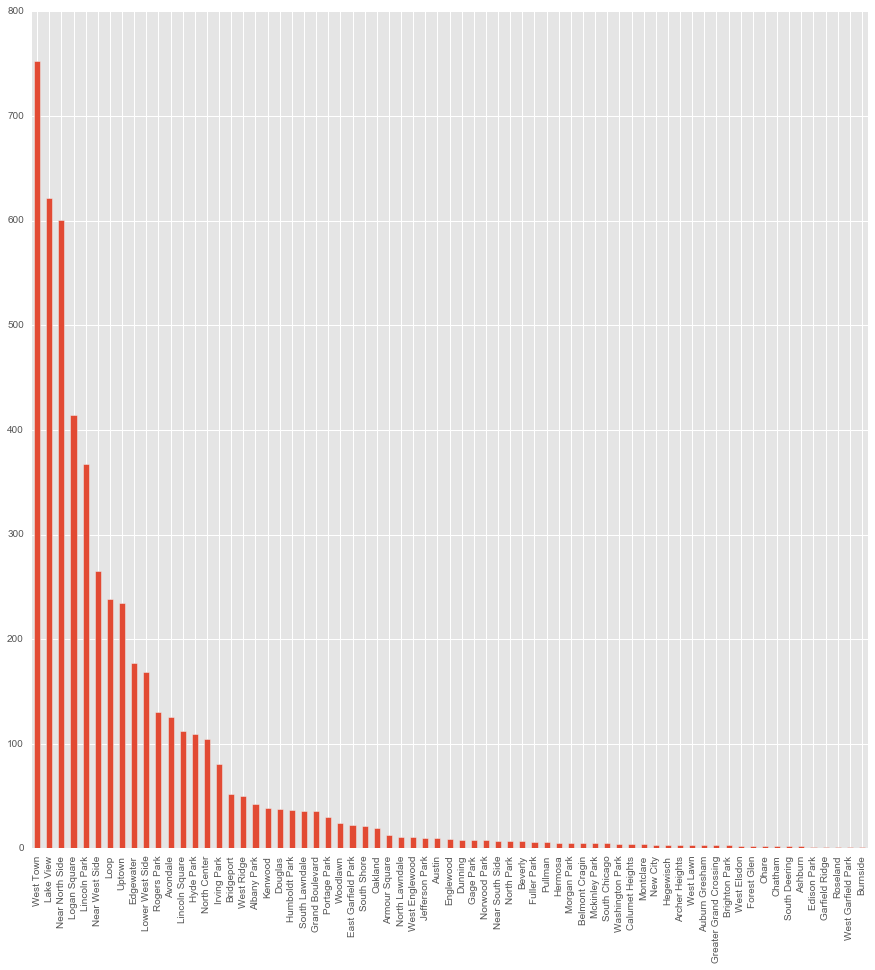

In [92]:
n_hoods = [(row[0]) for row in chicago_listing.neighbourhood.value_counts().to_frame().iterrows()]

fig, ax = plt.subplots(1,1) 

chicago_listing.neighbourhood.value_counts().plot(kind='bar', figsize=(15,15))

ax.set_xticklabels(n_hoods,rotation='vertical')
plt.show()

In [90]:
str(chicago_listing)

"           id                                 name   host_id  \\\n0     1874928  Sunny 2Bd 1Ba HEART of LINCOLN SQ.!   9767449   \n1      739495  Lovely 2 bedroom in Lincoln Square    3867687   \n2     1696051  Unique Pet Friendly 1BR Coach House   3350653   \n3     5152597    Sunny 2nd Floor in Lincoln Square  22591305   \n4     8036094     Bright & Homey in Lincoln Square   7950629   \n5     7395957           Lincoln Square Guest Suite  31551384   \n6     6316235        Very Spacious Mid-Century Gem  12608762   \n7     6213619         Spacious 2 bed in Ravenswood   2966741   \n8     4157774  Great Spacious condo in Lincoln Sq!   9510172   \n9     1359619                 Posh Digs in Chicago   7379714   \n10    6864525                 Cozy and Quiet space  18999598   \n11    8043570  Ravenswood Private 1BD/1BR By Train  34925165   \n12    7637490    Unique, Large2B in Lincoln Square  26790353   \n13    6634916     Vintage Lincoln Square Sanctuary  34473759   \n14    3325262    Gorgeo